## The project notes 2 is an extension of project notes 1. The project notes 1 was completed and data was exported as Sales_Project_notes_2. We will continue from there and start our next pahse of model building

In [1]:
# Importing basic libraries..

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math


from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# importing the dataset..comparing the data with the last exported data for correctness and proceeding ahead with model building.

In [4]:
df=pd.read_csv('Sales_Project_notes_2.csv')

In [5]:
df.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,Agent_bonus_Per_Policy,Sum_assured_Per_Policy
0,22.0,4.0,Agent,Salaried,Graduate,Female,Manager,2.0,Single,20993.0,2.0,North,Half Yearly,2204.500000,403380.50
1,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,Manager,4.0,Divorced,20130.0,3.0,North,Yearly,553.500000,73625.50
2,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,Executive,3.0,Unmarried,17090.0,2.0,North,Yearly,1424.333333,192992.00
3,11.0,2.0,Third Party Partner,Salaried,Graduate,Female,Executive,3.0,Divorced,17909.0,2.0,West,Half Yearly,597.000000,89545.00
4,6.0,4.0,Agent,Small Business,Under Graduate,Male,Executive,4.0,Divorced,18468.0,4.0,West,Half Yearly,738.750000,91601.25


In [6]:
df.tail()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,Agent_bonus_Per_Policy,Sum_assured_Per_Policy
4515,4.0,8.0,Agent,Small Business,Graduate,Male,Senior Manager,2.0,Single,26355.0,2.0,West,Yearly,1976.5,318236.5
4516,9.0,9.0,Agent,Salaried,Under Graduate,Female,Executive,2.0,Married,20991.0,3.0,North,Yearly,1469.5,148406.5
4517,23.0,23.0,Agent,Salaried,Engineer,Female,AVP,5.0,Single,21606.0,2.0,North,Half Yearly,758.4,133474.2
4518,10.0,10.0,Online,Small Business,Graduate,Female,Executive,2.0,Single,20068.0,6.0,West,Half Yearly,2408.0,471999.5
4519,14.0,10.0,Agent,Salaried,Under Graduate,Female,Manager,2.0,Married,23820.0,3.0,North,Half Yearly,2382.0,350154.0


In [7]:
df.shape

(4520, 15)

We have compared the data which was exported and saved as csv file with the data imported and it is good to go.

#### The second set of project notes must include the model building aspect and be aligned to the analytical business problem the Capstone Project addresses. It should also include the rationale behind using/building one particular model (if applicable). The notes should be brief and succinct containing the depiction of the results for the models built aligned with the objective of the project. 

In [8]:
# Before we proceed for model building we will create copies of our original model to use it as and when needed..

In [9]:
df1=df.copy()

In [26]:
df2=df1.copy()

In [29]:
for col in df2.columns: 
    if df2[col].dtype == 'object': 
        print('\n')
        print('Columns is :',col)
        print(pd.Categorical(df2[col].unique()))
        print(pd.Categorical(df2[col].unique()).codes)
        df2[col] = pd.Categorical(df2[col]).codes



Columns is : Channel
['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']
[0 2 1]


Columns is : Occupation
['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Free Lancer', 'Large Business', 'Salaried', 'Small Business']
[2 0 3 1]


Columns is : EducationField
['Graduate', 'Post Graduate', 'Under Graduate', 'Engineer', 'Diploma', 'MBA']
Categories (6, object): ['Diploma', 'Engineer', 'Graduate', 'MBA', 'Post Graduate', 'Under Graduate']
[2 4 5 1 0 3]


Columns is : Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


Columns is : Designation
['Manager', 'Executive', 'VP', 'AVP', 'Senior Manager']
Categories (5, object): ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']
[2 1 4 0 3]


Columns is : MaritalStatus
['Single', 'Divorced', 'Unmarried', 'Married']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unmarried']
[2 0 3 1]


Columns is : Zone
['Nor

In [30]:
df2.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,Agent_bonus_Per_Policy,Sum_assured_Per_Policy
0,22.0,4.0,0,2,2,0,2,2.0,2,20993.0,2.0,1,0,2204.500000,403380.50
1,11.0,2.0,2,2,2,1,2,4.0,0,20130.0,3.0,1,3,553.500000,73625.50
2,26.0,4.0,0,0,4,1,1,3.0,3,17090.0,2.0,1,3,1424.333333,192992.00
3,11.0,2.0,2,2,2,0,1,3.0,0,17909.0,2.0,3,0,597.000000,89545.00
4,6.0,4.0,0,3,5,1,1,4.0,0,18468.0,4.0,3,0,738.750000,91601.25


In [31]:
df_new=df2.copy()

In [32]:
df1.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,Agent_bonus_Per_Policy,Sum_assured_Per_Policy
0,22.0,4.0,Agent,Salaried,Graduate,Female,Manager,2.0,Single,20993.0,2.0,North,Half Yearly,2204.500000,403380.50
1,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,Manager,4.0,Divorced,20130.0,3.0,North,Yearly,553.500000,73625.50
2,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,Executive,3.0,Unmarried,17090.0,2.0,North,Yearly,1424.333333,192992.00
3,11.0,2.0,Third Party Partner,Salaried,Graduate,Female,Executive,3.0,Divorced,17909.0,2.0,West,Half Yearly,597.000000,89545.00
4,6.0,4.0,Agent,Small Business,Under Graduate,Male,Executive,4.0,Divorced,18468.0,4.0,West,Half Yearly,738.750000,91601.25


In [33]:
df_new.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,Agent_bonus_Per_Policy,Sum_assured_Per_Policy
0,22.0,4.0,0,2,2,0,2,2.0,2,20993.0,2.0,1,0,2204.500000,403380.50
1,11.0,2.0,2,2,2,1,2,4.0,0,20130.0,3.0,1,3,553.500000,73625.50
2,26.0,4.0,0,0,4,1,1,3.0,3,17090.0,2.0,1,3,1424.333333,192992.00
3,11.0,2.0,2,2,2,0,1,3.0,0,17909.0,2.0,3,0,597.000000,89545.00
4,6.0,4.0,0,3,5,1,1,4.0,0,18468.0,4.0,3,0,738.750000,91601.25


## 1). Model building and interpretation

#### a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)

Split the data into train and Test data set

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4520 non-null   float64
 1   CustTenure              4520 non-null   float64
 2   Channel                 4520 non-null   int8   
 3   Occupation              4520 non-null   int8   
 4   EducationField          4520 non-null   int8   
 5   Gender                  4520 non-null   int8   
 6   Designation             4520 non-null   int8   
 7   NumberOfPolicy          4520 non-null   float64
 8   MaritalStatus           4520 non-null   int8   
 9   MonthlyIncome           4520 non-null   float64
 10  ExistingPolicyTenure    4520 non-null   float64
 11  Zone                    4520 non-null   int8   
 12  PaymentMethod           4520 non-null   int8   
 13  Agent_bonus_Per_Policy  4520 non-null   float64
 14  Sum_assured_Per_Policy  4520 non-null   

In [35]:
X=df_new.drop('Agent_bonus_Per_Policy',axis=1)
y=df_new[['Agent_bonus_Per_Policy']]

In [36]:
X.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,Sum_assured_Per_Policy
0,22.0,4.0,0,2,2,0,2,2.0,2,20993.0,2.0,1,0,403380.50
1,11.0,2.0,2,2,2,1,2,4.0,0,20130.0,3.0,1,3,73625.50
2,26.0,4.0,0,0,4,1,1,3.0,3,17090.0,2.0,1,3,192992.00
3,11.0,2.0,2,2,2,0,1,3.0,0,17909.0,2.0,3,0,89545.00
4,6.0,4.0,0,3,5,1,1,4.0,0,18468.0,4.0,3,0,91601.25


In [37]:
y.head()

,Agent_bonus_Per_Policy
0,2204.500000
1,553.500000
2,1424.333333
3,597.000000
4,738.750000


In [38]:
X.shape

(4520, 14)

In [39]:
y.shape

(4520, 1)

We have 4520 rows of data and we need to split the data into train and test for model building.We need to find a good ratio for our split so that it can be justified and more accurate results can be derived from the models.

In [40]:
print('If split percentage of  data is 60/40 then train_data is',(4520*0.6), 'and test data is',(4520*0.4))
print('If split percentage of  data is 65/35 then train_data is',(4520*0.65), 'and test data is',(4520*0.35))
print('If split percentage of  data is 70/30 then train_data is',(4520*0.7), 'and test data is',(4520*0.3))
print('If split percentage of  data is 75/25 then train_data is',(4520*0.75), 'and test data is',(4520*0.25))
print('If split percentage of  data is 68/33 then train_data is',(4520*0.67), 'and test data is',(4520*0.33))

If split percentage of  data is 60/40 then train_data is 2712.0 and test data is 1808.0
If split percentage of  data is 65/35 then train_data is 2938.0 and test data is 1582.0
If split percentage of  data is 70/30 then train_data is 3164.0 and test data is 1356.0
If split percentage of  data is 75/25 then train_data is 3390.0 and test data is 1130.0
If split percentage of  data is 68/33 then train_data is 3028.4 and test data is 1491.6000000000001


Given the size of the data we can settle for 67/33 ratio for train and test data.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=1)

In [42]:
print('Shape for X_train is ',X_train.shape)
print('Shape for X_test is ',X_test.shape)
print('Shape for y_train is ',y_train.shape)
print('Shape for y_test is ',y_test.shape)

Shape for X_train is  (3028, 14)
Shape for X_test is  (1492, 14)
Shape for y_train is  (3028, 1)
Shape for y_test is  (1492, 1)


### SKLearn Linear Model

In [43]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [44]:
for id, col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model.coef_[0][id]))

The coefficient for Age is 4.559308195951619
The coefficient for CustTenure is 4.48711465530082
The coefficient for Channel is -8.69414171788064
The coefficient for Occupation is 4.756481057067572
The coefficient for EducationField is -3.788393427059755
The coefficient for Gender is 9.942369590979972
The coefficient for Designation is 5.905692200652281
The coefficient for NumberOfPolicy is -135.09993477113767
The coefficient for MaritalStatus is 13.114749490084574
The coefficient for MonthlyIncome is 0.009671554103689388
The coefficient for ExistingPolicyTenure is 3.1881838118774035
The coefficient for Zone is -3.796137158014384
The coefficient for PaymentMethod is 0.8427202451412025
The coefficient for Sum_assured_Per_Policy is 0.004850042346581288


In [60]:
for id, col in enumerate(X_train.columns):
    print('The meaning of coefficents is explained in a better way below:')
    
    
    
    print("For a unit change in {} agent bonus per policy will change by  {}".format(col, regression_model.coef_[0][id])) 

The meaning of coefficents is explained in a better way below:
For a unit change in Age agent bonus per policy will change by  4.559308195951619
The meaning of coefficents is explained in a better way below:
For a unit change in CustTenure agent bonus per policy will change by  4.48711465530082
The meaning of coefficents is explained in a better way below:
For a unit change in Channel agent bonus per policy will change by  -8.69414171788064
The meaning of coefficents is explained in a better way below:
For a unit change in Occupation agent bonus per policy will change by  4.756481057067572
The meaning of coefficents is explained in a better way below:
For a unit change in EducationField agent bonus per policy will change by  -3.788393427059755
The meaning of coefficents is explained in a better way below:
For a unit change in Gender agent bonus per policy will change by  9.942369590979972
The meaning of coefficents is explained in a better way below:
For a unit change in Designation ag

In [45]:
for id, col in enumerate(X_train.columns):
    print("{} * {}".format(col, regression_model.coef_[0][id]), end=' + ')
print(regression_model.intercept_[0])

Age * 4.559308195951619 + CustTenure * 4.48711465530082 + Channel * -8.69414171788064 + Occupation * 4.756481057067572 + EducationField * -3.788393427059755 + Gender * 9.942369590979972 + Designation * 5.905692200652281 + NumberOfPolicy * -135.09993477113767 + MaritalStatus * 13.114749490084574 + MonthlyIncome * 0.009671554103689388 + ExistingPolicyTenure * 3.1881838118774035 + Zone * -3.796137158014384 + PaymentMethod * 0.8427202451412025 + Sum_assured_Per_Policy * 0.004850042346581288 + 474.0797477285163


In [46]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 474.0797477285163


In [62]:
intercept = regression_model.intercept_[0]

print("The intercept contains the effect of all the omitted variables that we have not considered in this model and the it simply means that when all the independent variables are 0 still agent bonus per policy will still be {}".format(intercept))

The intercept contains the effect of all the omitted variables that we have not considered in this model and the it simply means that when all the independent variables are 0 still agent bonus per policy will still be 474.0797477285163


In [76]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9149728934429991


In [77]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.9007990742890409


The coefficient of determination, denoted as 𝑅², tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱, using the particular regression model. A larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs. The larger the value of R^2 the less the unexplained variance is.

The value 𝑅² = 1 corresponds to SSR = 0. That’s the perfect fit, since the values of predicted and actual responses fit completely to each other.

R-Squared: R2 is a statistic that will give some information about the goodness of fit of a model. It ranges from 0 to 1. Exxample: if the value of R-squared is 0.75 so it explains 75% of variance is explained by the model and 25% of variance cannot be explained.

For this Model , we have R^2 for train data  as 0.9149, which means 91.49% or ~92.5 % of variance is explained by the model. For test data the R^2 is 0.9007 or 90.07% which means 90% of variance is explained by the model and only ~7% variance cannot be explained.

One way to assess how well a regression model fits a dataset is to calculate the root mean square error, which is a metric that tells us the average distance between the predicted values from the model and the actual values in the dataset.

The lower the RMSE, the better a given model is able to “fit” a dataset.

The formula to find the root mean square error, often abbreviated RMSE, is as follows:

RMSE = Square root of ( sum(Pi – Oi)**2 / n)

where:

Σ is a fancy symbol that means “sum”
Pi is the predicted value for the ith observation in the dataset
Oi is the observed value for the ith observation in the dataset
n is the sample size

This means that the RMSE represents the square root of the variance of the residuals.

suppose we want to build a regression model to predict the exam score of students and we want to find the best possible model among several potential models.

Suppose we fit three different regression models and find their corresponding RMSE values:

RMSE of Model 1: 14.5
RMSE of Model 2: 16.7
RMSE of Model 3: 9.8

 Then,Model 3 has the lowest RMSE, which tells us that it’s able to fit the dataset the best out of the three potential models.

In [78]:
#RMSE for Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
print("The Root Mean Square Error (RMSE) of the model is for training set is",np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

The Root Mean Square Error (RMSE) of the model is for training set is 301.37590726277983


In [79]:
#RMSE for Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

The Root Mean Square Error (RMSE) of the model is for testing set is 315.8326115941314


The mean squared error of the model for testing is 315.8326115941314


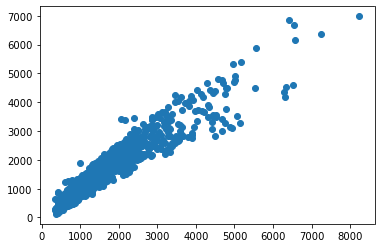

In [81]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
import math
print('The mean squared error of the model for testing is',math.sqrt(mse))
#mpg prediction
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['Agent_bonus_Per_Policy'], y_pred)

### Stats Model-OLS Model

In [83]:
df_new.columns

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'Designation', 'NumberOfPolicy', 'MaritalStatus',
       'MonthlyIncome', 'ExistingPolicyTenure', 'Zone', 'PaymentMethod',
       'Agent_bonus_Per_Policy', 'Sum_assured_Per_Policy'],
      dtype='object')

In [84]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 508 to 235
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3028 non-null   float64
 1   CustTenure              3028 non-null   float64
 2   Channel                 3028 non-null   int8   
 3   Occupation              3028 non-null   int8   
 4   EducationField          3028 non-null   int8   
 5   Gender                  3028 non-null   int8   
 6   Designation             3028 non-null   int8   
 7   NumberOfPolicy          3028 non-null   float64
 8   MaritalStatus           3028 non-null   int8   
 9   MonthlyIncome           3028 non-null   float64
 10  ExistingPolicyTenure    3028 non-null   float64
 11  Zone                    3028 non-null   int8   
 12  PaymentMethod           3028 non-null   int8   
 13  Sum_assured_Per_Policy  3028 non-null   float64
 14  Agent_bonus_Per_Policy  3028 non-null  

In [89]:
f_1 = 'Agent_bonus_Per_Policy~Age+CustTenure+Channel+Occupation+EducationField+Gender+Designation+NumberOfPolicy+MaritalStatus+MonthlyIncome+ExistingPolicyTenure+Zone+PaymentMethod+Sum_assured_Per_Policy'

In [87]:
import statsmodels.formula.api as SM

In [90]:
lm1 = SM.ols(formula = f_1, data= train).fit()
lm1.params

Intercept                 474.079748
Age                         4.559308
CustTenure                  4.487115
Channel                    -8.694142
Occupation                  4.756481
EducationField             -3.788393
Gender                      9.942370
Designation                 5.905692
NumberOfPolicy           -135.099935
MaritalStatus              13.114749
MonthlyIncome               0.009672
ExistingPolicyTenure        3.188184
Zone                       -3.796137
PaymentMethod               0.842720
Sum_assured_Per_Policy      0.004850
dtype: float64

In [91]:
print(lm1.summary()) 

                              OLS Regression Results                              
Dep. Variable:     Agent_bonus_Per_Policy   R-squared:                       0.915
Model:                                OLS   Adj. R-squared:                  0.915
Method:                     Least Squares   F-statistic:                     2316.
Date:                    Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                            12:54:07   Log-Likelihood:                -21581.
No. Observations:                    3028   AIC:                         4.319e+04
Df Residuals:                        3013   BIC:                         4.328e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Metrics

In [92]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [93]:
import math
math.sqrt(mse)

315.8326115941314

In [94]:
# Finding the model score i.e. coeff of determinant
regression_model.score(X_test, y_test)

0.9007990742890409

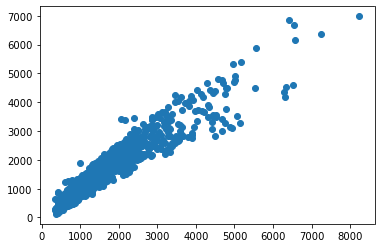

In [95]:
plt.scatter(y_test['Agent_bonus_Per_Policy'], y_pred)

Calculate VIF

Calculate VIF for each Field and based on VIF value we decide, which column can be eliminated


VIF (variance inflation factor) is used for checking multicollinearity in regression Model.
its Values can range between 1 to Infinite.

How to interpret a given VIF value?

Consider the following linear regression model:

Y = β0 + β1 × X1 + β2 × X2 + β3 × X3 + ε

For each of the independent variables X1, X2 and X3 we can calculate the variance inflation factor (VIF) in order to determine if we have a multicollinearity problem.

Here’s the formula for calculating the VIF for X1:

VIF1 = 1 / (1 - R**2)

VIF (variance inflating factor) formula for the first variable in the model
R2 in this formula is the coefficient of determination from the linear regression model which has:

X1 as dependent variable
X2 and X3 as independent variables
In other words, R2 comes from the following linear regression model:

X1 = β0 + β1 × X2 + β2 × X3 + ε

And because R2 is a number between 0 and 1:

When R2 is close to 1 (i.e. X2 and X3 are highly predictive of X1): the VIF will be very large
When R2 is close to 0 (i.e. X2 and X3 are not related to X1): the VIF will be close to 1
Therefore the range of VIF is between 1 and infinity.

In [96]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif = train.iloc[:,1:]
y = train['Agent_bonus_Per_Policy']

In [97]:
thres = 5

while True:
    Cols = range(x_vif.shape[1])
    
    vif = np.array([variance_inflation_factor(x_vif.values, i) for i in Cols])
    if all(vif < thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif))
        x_vif = x_vif.iloc[:,Cols]

In [98]:
len(x_vif.columns)

10

In [99]:
x_vif.columns

Index(['CustTenure', 'Channel', 'EducationField', 'Gender', 'Designation',
       'MaritalStatus', 'ExistingPolicyTenure', 'Zone', 'PaymentMethod',
       'Sum_assured_Per_Policy'],
      dtype='object')

So features has been eliminated to 10 from total 14 features of Trian data set.
Now lets run the Stats Model one more time.

In [100]:
f_2 = 'Agent_bonus_Per_Policy~CustTenure+Channel+EducationField+Gender+Designation+MaritalStatus+ExistingPolicyTenure+Zone+PaymentMethod+Sum_assured_Per_Policy'

In [103]:
lm2 = SM.ols(formula = f_2, data= train).fit()
lm2.params

Intercept                 61.920887
CustTenure                 3.079074
Channel                   -6.259113
EducationField            -2.138858
Gender                    18.243899
Designation               16.979978
MaritalStatus             12.170802
ExistingPolicyTenure       3.919562
Zone                       3.349435
PaymentMethod             -0.349521
Sum_assured_Per_Policy     0.005751
dtype: float64

In [104]:
print(lm2.summary()) 

                              OLS Regression Results                              
Dep. Variable:     Agent_bonus_Per_Policy   R-squared:                       0.899
Model:                                OLS   Adj. R-squared:                  0.899
Method:                     Least Squares   F-statistic:                     2685.
Date:                    Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                            13:20:58   Log-Likelihood:                -21842.
No. Observations:                    3028   AIC:                         4.371e+04
Df Residuals:                        3017   BIC:                         4.377e+04
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [105]:
#Concatenation of X and y into one DF
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,Sum_assured_Per_Policy,Agent_bonus_Per_Policy
508,13.0,2.0,0,3,5,0,2,5.0,0,21725.0,3.0,1,0,63002.6,434.60
1231,14.0,3.0,1,3,5,1,1,3.0,1,17008.0,1.0,3,3,192992.0,907.00
2723,28.0,5.0,0,1,1,1,3,5.0,0,21606.0,2.0,1,3,107105.2,939.60
3245,10.0,10.0,0,3,5,0,1,4.0,1,21974.0,1.0,3,1,94268.5,604.25
41,2.0,2.0,0,2,2,1,1,2.0,0,17177.0,7.0,1,3,289488.0,1202.50


In [106]:
data_test.head(10)

,Age,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,Sum_assured_Per_Policy,Agent_bonus_Per_Policy
610,11.0,23.0,2,2,2,1,2,2.0,2,22756.0,1.0,3,0,3.925410e+05,2844.500000
1519,20.0,7.0,0,3,5,0,4,1.0,1,34517.0,7.0,1,0,1.200156e+06,6558.000000
1620,7.0,15.0,0,2,4,1,2,1.0,1,18697.0,4.0,1,0,4.302180e+05,2431.000000
2031,13.0,22.0,2,3,5,1,2,4.0,1,21385.0,4.0,1,0,2.211742e+05,1122.750000
494,12.0,14.0,0,3,5,1,1,3.0,0,17259.0,1.0,3,0,8.456900e+04,805.333333
1011,11.0,22.0,0,2,2,1,0,3.0,2,21606.0,13.0,3,0,2.971067e+05,1822.666667
3818,15.0,10.0,0,3,5,1,1,2.0,1,20527.0,2.0,1,0,4.669895e+05,2566.000000
3970,31.0,25.0,0,3,0,1,0,4.0,1,32575.0,25.0,3,3,1.655625e+05,1547.250000
745,18.0,18.0,2,2,2,1,1,2.0,0,18867.0,1.0,3,3,2.513085e+05,2264.000000
3240,35.0,12.0,0,2,2,0,3,2.0,2,26402.0,15.0,3,0,4.966215e+05,2904.000000


In [108]:
# Calculation of MSE
mse = np.mean((lm1.predict(data_train.drop('Agent_bonus_Per_Policy',axis=1))-data_train['Agent_bonus_Per_Policy'])**2)
mse

90827.43747846359

In [113]:
#Root Mean Squared Error
print("The Root Mean Square Error (RMSE) of the OLS model is",np.sqrt(mse))

The Root Mean Square Error (RMSE) of the OLS model is 301.3759072627797


In [110]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(61.92) * Intercept + (3.08) * CustTenure + (-6.26) * Channel + (-2.14) * EducationField + (18.24) * Gender + (16.98) * Designation + (12.17) * MaritalStatus + (3.92) * ExistingPolicyTenure + (3.35) * Zone + (-0.35) * PaymentMethod + (0.01) * Sum_assured_Per_Policy + 

In [111]:
vif = [variance_inflation_factor(x_vif.values, ix) for ix in range(x_vif.shape[1])]

In [112]:
i=0
for column in x_vif.columns:
    if i < len(x_vif.columns):
        print ('VIF for ',column ,"-->",  vif[i])
        i = i+1

VIF for  CustTenure --> 3.747322350643076
VIF for  Channel --> 1.354821934621015
VIF for  EducationField --> 3.0146301437349856
VIF for  Gender --> 2.2152924327596484
VIF for  Designation --> 3.6584099794724305
VIF for  MaritalStatus --> 2.9245715800576892
VIF for  ExistingPolicyTenure --> 2.189713638304043
VIF for  Zone --> 4.310506492275995
VIF for  PaymentMethod --> 1.5637231207100406
VIF for  Sum_assured_Per_Policy --> 2.829045662325185


### Decision Tree Regressor Model

In [114]:
X_train.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,Sum_assured_Per_Policy
508,13.0,2.0,0,3,5,0,2,5.0,0,21725.0,3.0,1,0,63002.6
1231,14.0,3.0,1,3,5,1,1,3.0,1,17008.0,1.0,3,3,192992.0
2723,28.0,5.0,0,1,1,1,3,5.0,0,21606.0,2.0,1,3,107105.2
3245,10.0,10.0,0,3,5,0,1,4.0,1,21974.0,1.0,3,1,94268.5
41,2.0,2.0,0,2,2,1,1,2.0,0,17177.0,7.0,1,3,289488.0


In [115]:
y_train.head()

,Agent_bonus_Per_Policy
508,434.60
1231,907.00
2723,939.60
3245,604.25
41,1202.50


In [116]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3028, 14) (1492, 14) (3028, 1) (1492, 1)


In [117]:
# Decision tree Regression Model building
# Importing the regressor

from sklearn.tree import DecisionTreeRegressor

In [120]:
# Creating and fitting the model

DT_model=DecisionTreeRegressor().fit(X_train,y_train)

In [121]:
# The coefficient of determinantion

print('The training r square is : %.2f'% DT_model.score(X_train,y_train))

The training r square is : 1.00


In [122]:
# Training Model Evaluation..

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,explained_variance_score,r2_score

In [123]:
# prediction on training data

y_train_pred_DT=DT_model.predict(X_train)

In [124]:
# T r_sq

print('the r_sq is:', r2_score(y_train,y_train_pred_DT))

the r_sq is: 1.0


In [125]:
# The MAE ( Mean asbsolute error)

print('The MAE is:', mean_absolute_error(y_train,y_train_pred_DT))

The MAE is: 0.0


In [126]:
# The MSE ( Mean Squared Error)

print(' The MSE is:', mean_squared_error(y_train,y_train_pred_DT))

 The MSE is: 0.0


In [127]:
# The RMSE ( Root Mean Squared Error)

print( 'The RMSE is', np.sqrt(mean_squared_error(y_train,y_train_pred_DT)))

The RMSE is 0.0


In [128]:
# The MAPE ( Mean Absolute Percentage Error)

print( 'The MAPE is', mean_absolute_percentage_error(y_train,y_train_pred_DT))

The MAPE is 0.0


In [130]:
# The EVS (Expalained Variance Score)

print('The EVS is', explained_variance_score(y_train,y_train_pred_DT))

The EVS is 1.0


In [131]:
# Prediction on the testing data

y_test_pred_DT=DT_model.predict(X_test)

In [136]:
# The R=r_sq

print('the r_sq is:%.2f'% r2_score(y_test,y_test_pred_DT))

the r_sq is:0.88


In [137]:
print('The testing r_sq is: %.2f'% DT_model.score(X_test,y_test))

The testing r_sq is: 0.88


In [138]:
# Plotting the observed and predicted agent bonus

import matplotlib.pyplot as plt

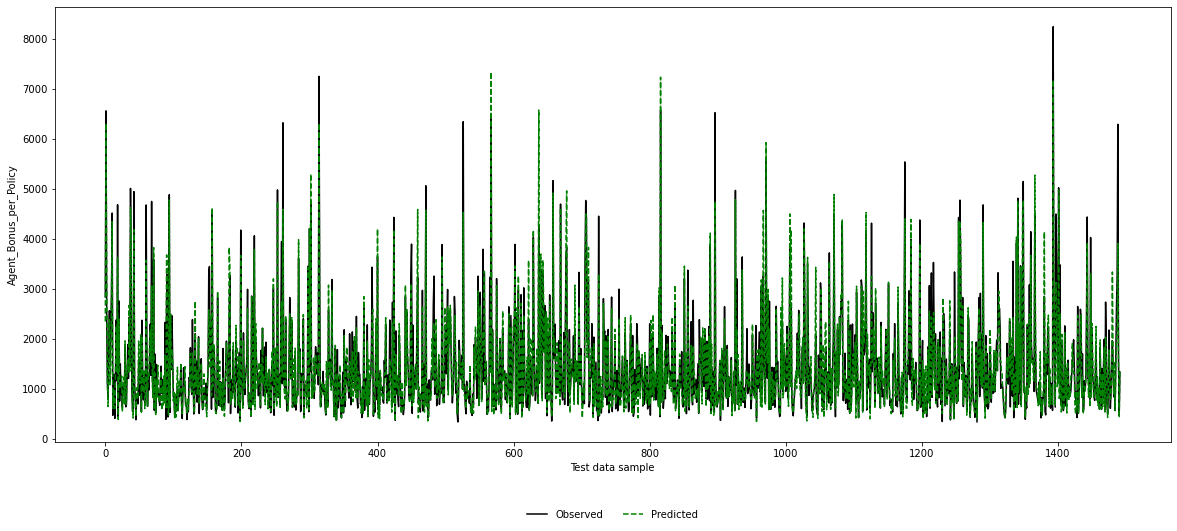

In [146]:
# Setting the boundries and parameters

plt.rcParams['figure.figsize']=(20,8)
x_ax=range(len(X_test))

# Plotting

plt.plot(x_ax,y_test,label='Observed',color='k',linestyle='-');
plt.plot(x_ax,y_test_pred_DT,label='Predicted',color='g',linestyle='--')
plt.ylabel('Agent_Bonus_per_Policy')
plt.xlabel('Test data sample')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)
plt.show()

In [ ]:
# Plotting the prediction errors and residuals
# Cmd/Anaconda prompt and type : pip install yellowbrick

In [147]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


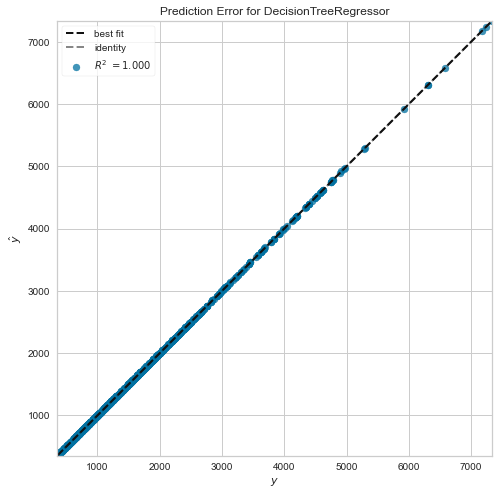

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [212]:
# Prediction error..

from yellowbrick.regressor import PredictionError

visualizer=PredictionError(DT_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test_pred_DT)
visualizer.poof()

In [155]:
from yellowbrick.regressor import ResidualsPlot

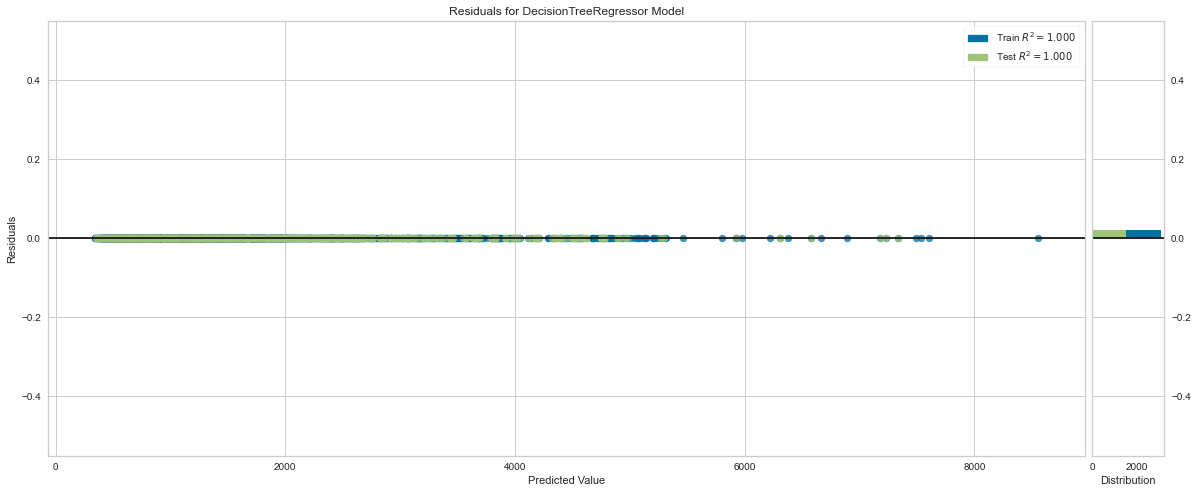

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [215]:
# Residual Errors...

visualizer=ResidualsPlot(DT_model)
visualizer.fit(X_train,y_train_pred_DT)
visualizer.score(X_test,y_test_pred_DT)
visualizer.poof()

In [165]:
# Testing Model Evaluation 

In [167]:
# The MAE

print('The MAE is %.2f'% mean_absolute_error(y_test,y_test_pred_DT))

The MAE is 230.84


In [168]:
# The MSE 

print('The MSE is %.2f'% mean_squared_error(y_test,y_test_pred_DT))

The MSE is 122017.48


In [170]:
# The RMSE 
print('The RMSE is %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred_DT)))

The RMSE is 349.31


In [171]:
# The MAPE 

print('The MAPE is %.2f'% mean_absolute_percentage_error(y_test,y_test_pred_DT))

The MAPE is 0.17


In [172]:
# The EVS 

print('The EVS is %.2f'% explained_variance_score(y_test,y_test_pred_DT))

The EVS is 0.88


In [173]:
# K-fold cross solution

from sklearn.model_selection import cross_val_score

In [176]:
# On the training dataset

score_train_DT_MSE=cross_val_score(DT_model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [177]:
score_train_DT_MSE

array([-113209.31540979, -115559.15233682, -126288.64435002,
       -121197.32924367, -131130.35699395, -172186.51987165,
       -122804.37674551, -145536.67022094, -161798.45176049,
       -132054.98017936])

In [178]:
score_train_DT_MSE=np.mean(score_train_DT_MSE)

In [179]:
score_train_DT_MSE

-134176.57971121962

In [180]:
# let us make it absolute ( positive)

from numpy import absolute


In [181]:
score_train_DT_MSE=absolute(score_train_DT_MSE)
score_train_DT_MSE

134176.57971121962

In [182]:
# on the testing data

score_test_DT_MSE=cross_val_score(DT_model,X_test,y_test,scoring='neg_mean_squared_error',cv=10)

In [183]:
score_test_DT_MSE

array([-165662.68477778, -232159.36467963, -112495.64314131,
       -226207.96168904, -213193.27469612, -131994.35320283,
       -169267.48255593, -149046.07196868, -161187.94935309,
       -250750.03711223])

In [185]:
score_test_DT_MSE=absolute(np.mean(score_test_DT_MSE))
score_test_DT_MSE

181196.4823176647

In [240]:
# Decision Tree Feature Rankings..
from sklearn.pipeline import Pipeline

In [241]:
f_list_DT=list(X.columns)
f_importance_DT=pd.Series(DT_model.feature_importances_,index=f_list_DT).sort_values(ascending=False)

In [242]:
print(f_importance_DT)

Sum_assured_Per_Policy    0.907811
Age                       0.020091
NumberOfPolicy            0.019759
CustTenure                0.016041
MonthlyIncome             0.015252
ExistingPolicyTenure      0.005865
EducationField            0.003479
Designation               0.002530
Channel                   0.002124
Occupation                0.001653
Gender                    0.001564
MaritalStatus             0.001400
Zone                      0.001389
PaymentMethod             0.001043
dtype: float64


### Random Forest Regressor Model

In [186]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3028, 14) (1492, 14) (3028, 1) (1492, 1)


In [187]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor

In [188]:
# Instantiation of the model

model=RandomForestRegressor(n_estimators=30,random_state=30)

In [189]:
RF_model=model.fit(X_train,y_train)

In [190]:
# Training Model Evaluation

In [191]:
# The training r_sq

print('The training r_sq is: %.2f'% RF_model.score(X_train,y_train))

The training r_sq is: 0.99


In [192]:
# Precition on the training data

y_train_pred_RF=RF_model.predict(X_train)

In [194]:
# The MAE

print('The MAE is: %.2f'% mean_absolute_error(y_train,y_train_pred_RF))

The MAE is: 65.44


In [195]:
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_train,y_train_pred_RF)))

The RMSE is:103.59


In [196]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_train,y_train_pred_RF))

The EVS is: 0.99


In [197]:
# Preduiction on the testing data

y_test_pred_RF=RF_model.predict(X_test)

In [199]:
# The testing coefficinet of determinination

print('The testing r_sq is: %.2f'% r2_score(y_test,y_test_pred_RF))

The testing r_sq is: 0.93


In [200]:
# Or

print('The testing r_sq is: %.2f'% RF_model.score(X_test,y_test))

The testing r_sq is: 0.93


In [201]:
# The metrics

In [202]:
# The MAE 
print('The MAE is:%.2f'% mean_absolute_error(y_test,y_test_pred_RF))

The MAE is:178.91


In [203]:
# MSE
print('The MSE is: %.2f'% mean_squared_error(y_test,y_test_pred_RF))

The MSE is: 74585.81


In [204]:
# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred_RF)))

The RMSE is: 273.10


In [205]:
# The EVS

print('The EVS is: %.2f'% explained_variance_score(y_test,y_test_pred_RF))

The EVS is: 0.93


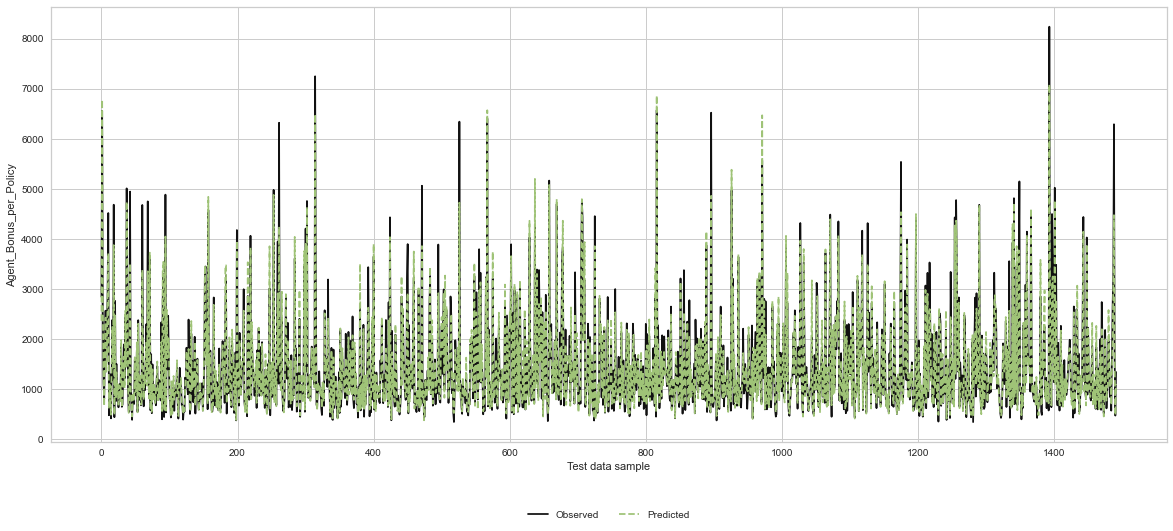

In [209]:
# Plotting the Observed and Predicted data
# Setting the boindaries and parameters


plt.rcParams['figure.figsize']=(20,8)
x_ax=range(len(X_test))
# Plotting

plt.plot(x_ax,y_test,label='Observed',color='k',linestyle='-');
plt.plot(x_ax,y_test_pred_RF,label='Predicted',color='g',linestyle='--')
plt.ylabel('Agent_Bonus_per_Policy')
plt.xlabel('Test data sample')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)
plt.show()

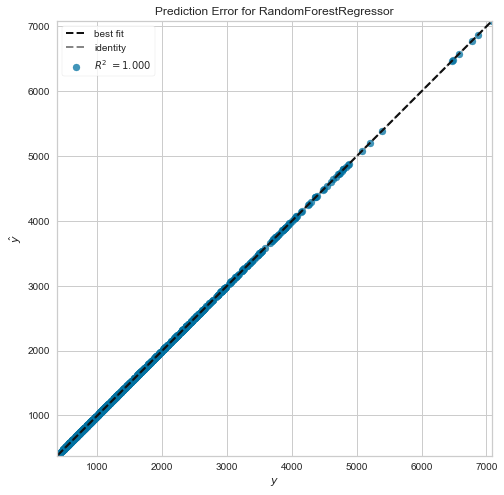

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [211]:
# Plotting the Residual Errors and Residuals

# Prediction errors train data...

from yellowbrick.regressor import PredictionError

visualizer=PredictionError(RF_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test_pred_RF)
visualizer.poof()

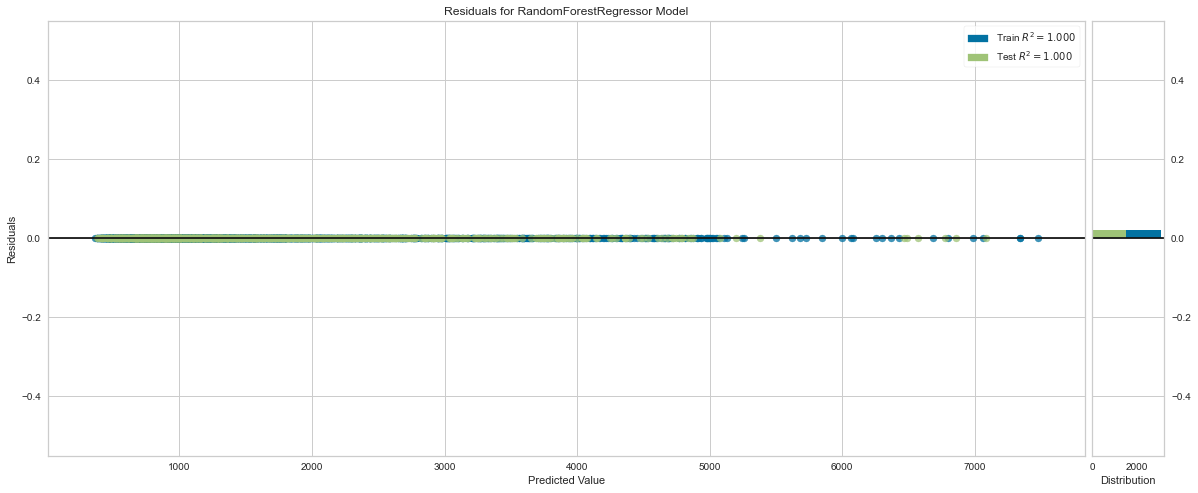

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [213]:
# Plotting the residuals

visualizer=ResidualsPlot(RF_model)
visualizer.fit(X_train,y_train_pred_RF)
visualizer.score(X_test,y_test_pred_RF)
visualizer.poof()

In [222]:
# K-fold cross solution

from sklearn.model_selection import cross_val_score

In [223]:
# Training model CV 

score_train_RF_MSE=cross_val_score(RF_model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [224]:
score_train_RF_MSE

array([-50766.30594474, -58481.20359701, -68380.20090307, -63425.29636599,
       -68410.2245211 , -56682.95341569, -84725.7571444 , -74326.17327241,
       -98050.7839241 , -70727.45289247])

In [225]:
score_train_RF_MSE=absolute(np.mean(score_train_RF_MSE))
score_train_RF_MSE

69397.63519809759

In [226]:
# Testing model CV 

score_test_RF_MSE=cross_val_score(RF_model,X_test,y_test,scoring='neg_mean_squared_error',cv=10)

In [227]:
score_test_RF_MSE=absolute(np.mean(score_test_RF_MSE))
score_test_RF_MSE

97978.19373001863

In [234]:
# Random Forest Feature Rankings..
from sklearn.pipeline import Pipeline

In [236]:
f_list_RF=list(X.columns)
f_importance_RF=pd.Series(RF_model.feature_importances_,index=f_list_RF).sort_values(ascending=False)

In [237]:
print(f_importance_RF)

Sum_assured_Per_Policy    0.909962
NumberOfPolicy            0.021229
Age                       0.017367
MonthlyIncome             0.015318
CustTenure                0.014023
ExistingPolicyTenure      0.008885
Designation               0.002485
EducationField            0.002104
PaymentMethod             0.001771
MaritalStatus             0.001656
Zone                      0.001361
Occupation                0.001337
Channel                   0.001308
Gender                    0.001195
dtype: float64
